In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

 Load Dataset

In [27]:
df = pd.read_csv(r"D:\New folder\diamonds_cleaned.csv")


Exploration

In [28]:
print("First 5 rows:")
display(df.head())

First 5 rows:


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,clarity_8,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,clarity_vs2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [9]:
print("\nDataset Info:")
display(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53788 entries, 0 to 53787
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53788 non-null  float64
 1   depth          53788 non-null  float64
 2   table          53788 non-null  float64
 3   price          53788 non-null  int64  
 4   x              53788 non-null  float64
 5   y              53788 non-null  float64
 6   z              53788 non-null  float64
 7   cut_Good       53788 non-null  bool   
 8   cut_Ideal      53788 non-null  bool   
 9   cut_Premium    53788 non-null  bool   
 10  cut_Very Good  53788 non-null  bool   
 11  cut_ideal      53788 non-null  bool   
 12  cut_premium    53788 non-null  bool   
 13  cut_very good  53788 non-null  bool   
 14  color_D        53788 non-null  bool   
 15  color_E        53788 non-null  bool   
 16  color_F        53788 non-null  bool   
 17  color_G        53788 non-null  bool

None

In [10]:
print("\nSummary statistics:")
display(df.describe())



Summary statistics:


,carat,depth,table,price,x,y,z
count,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000
mean,0.797793,61.748076,57.458178,3933.121477,5.731222,5.734663,3.538707
std,0.473414,1.429883,2.233732,3988.359598,1.120755,1.141270,0.705079
min,0.200000,43.000000,43.000000,-200.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Null values

In [11]:
print("\nNull values per column:")
display(df.isnull().sum())


Null values per column:


carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
cut_ideal        0
cut_premium      0
cut_very good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_8        0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
clarity_vs2      0
dtype: int64

Duplicates

In [12]:
duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")
if duplicates_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")



Number of duplicate rows: 0


Visualizations

In [ ]:
# ---Identify column types---
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

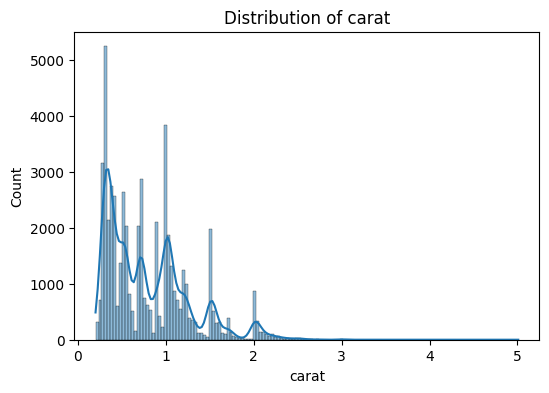

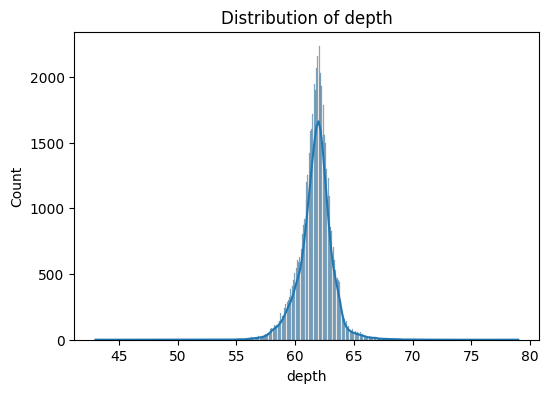

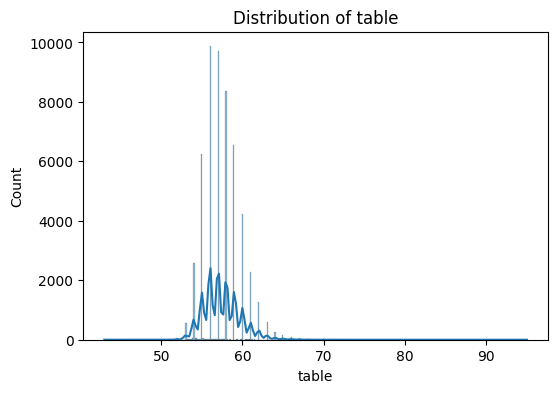

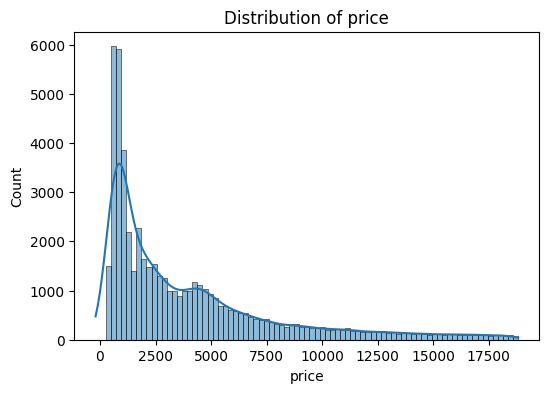

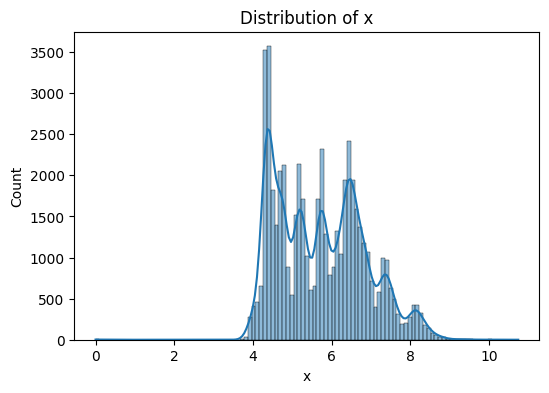

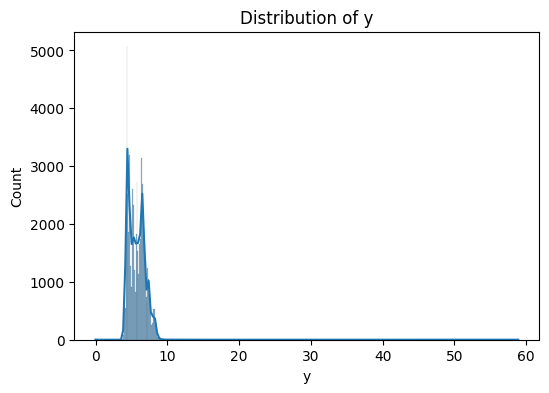

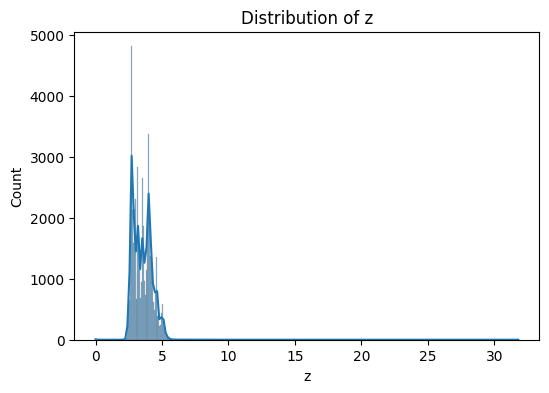

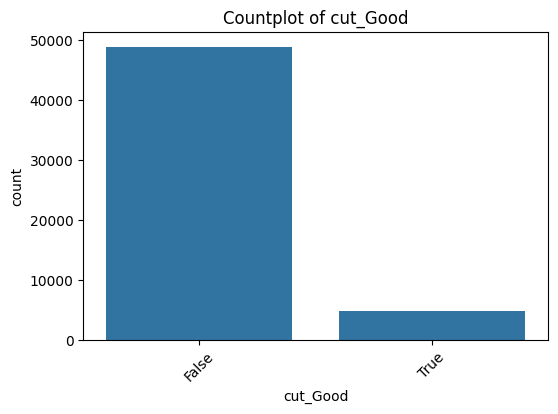

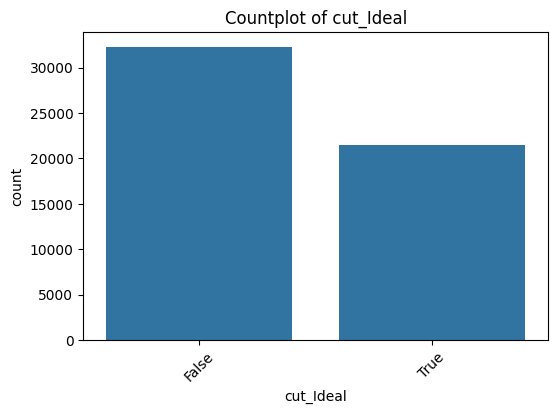

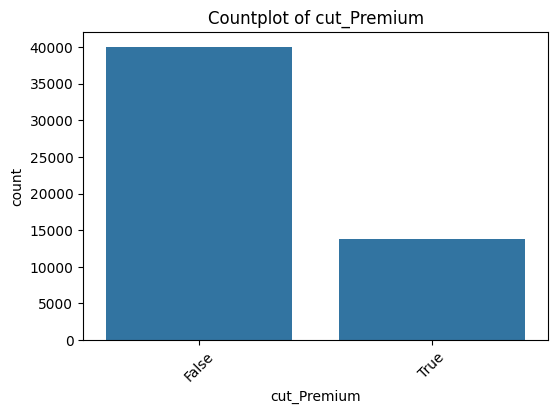

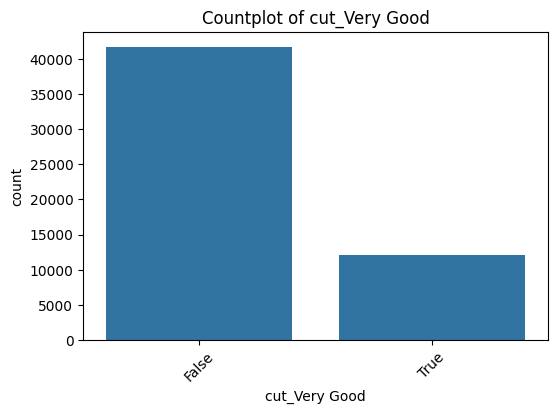

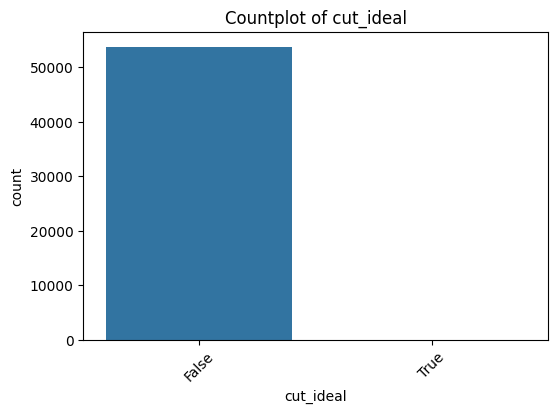

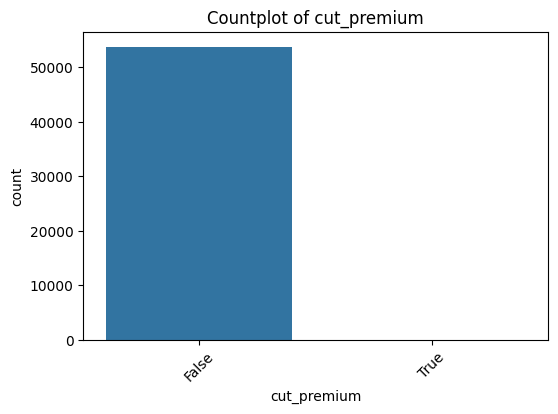

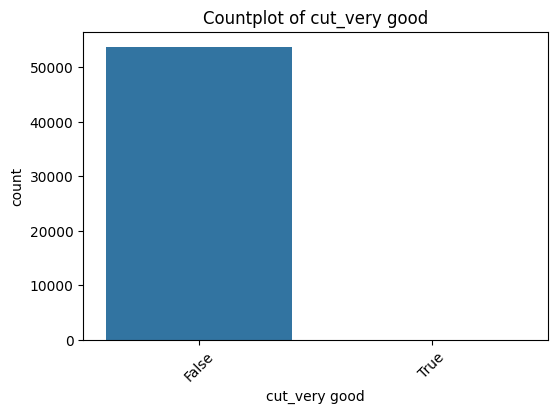

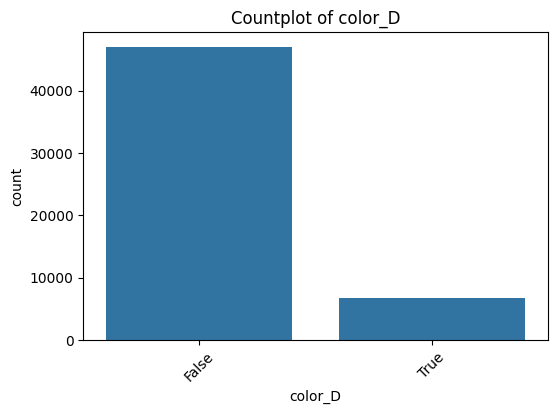

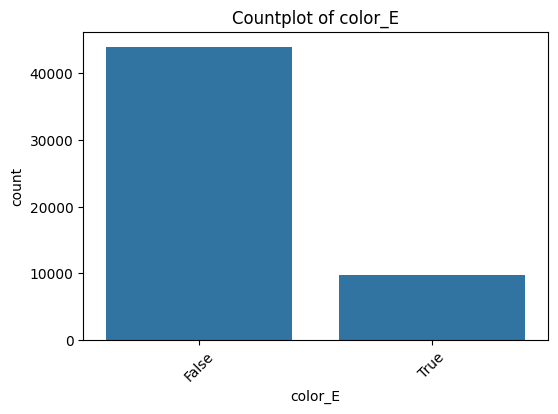

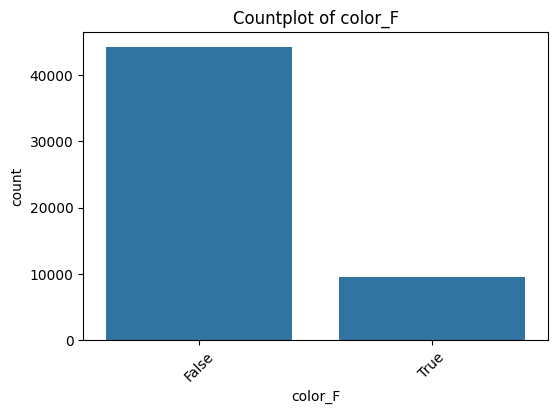

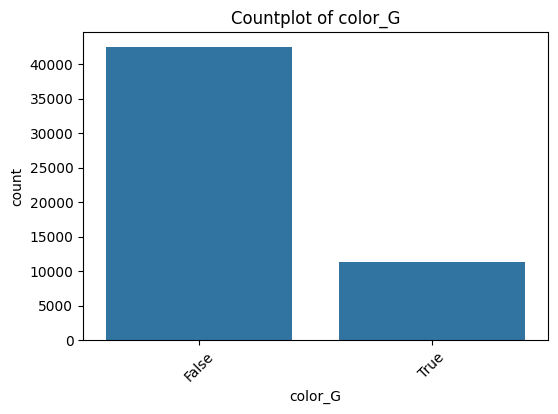

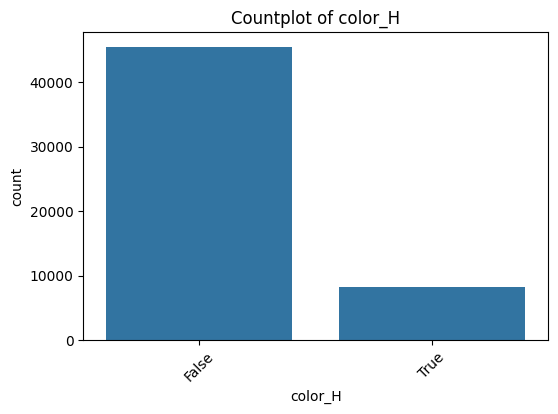

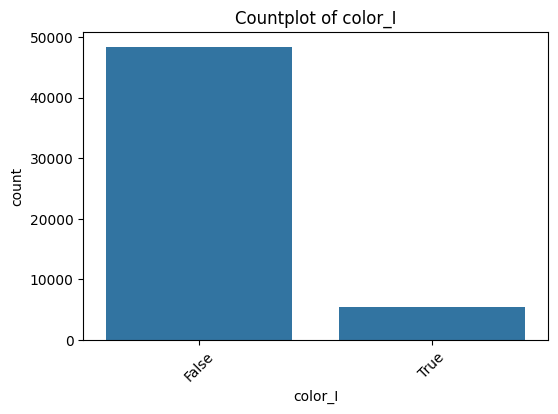

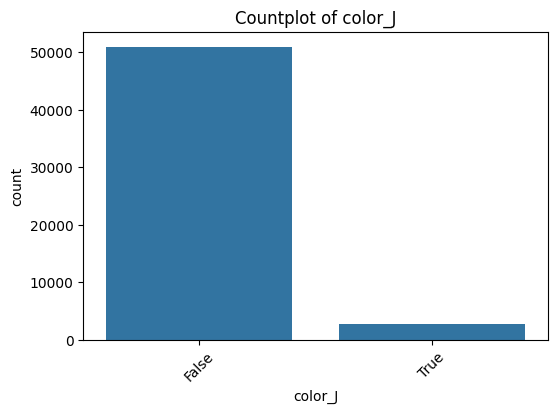

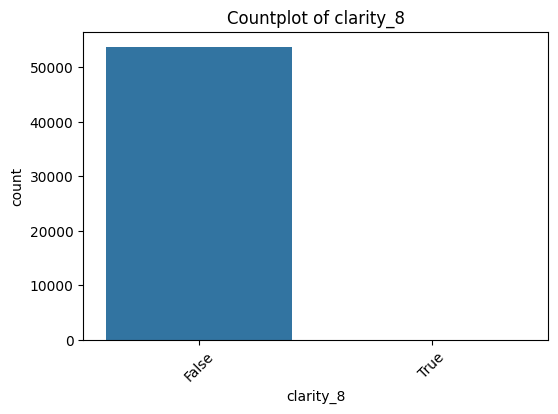

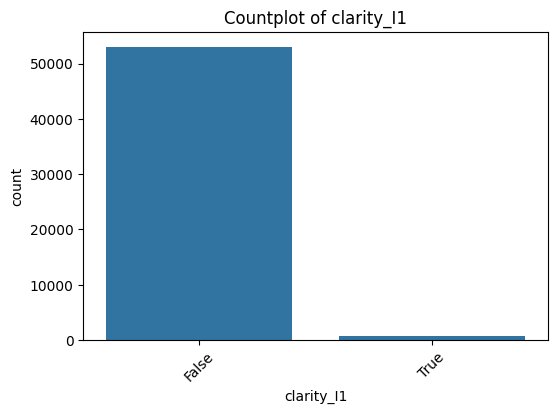

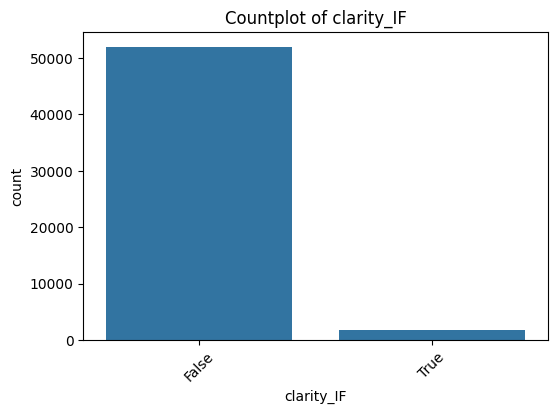

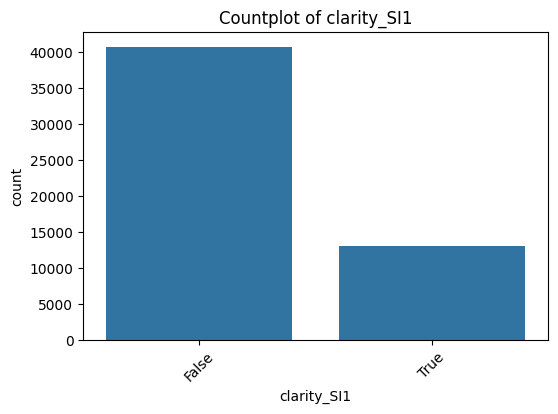

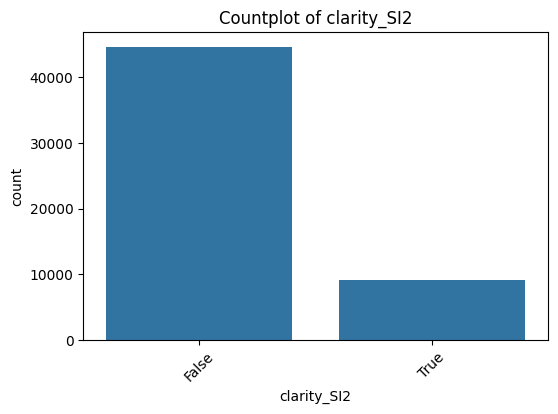

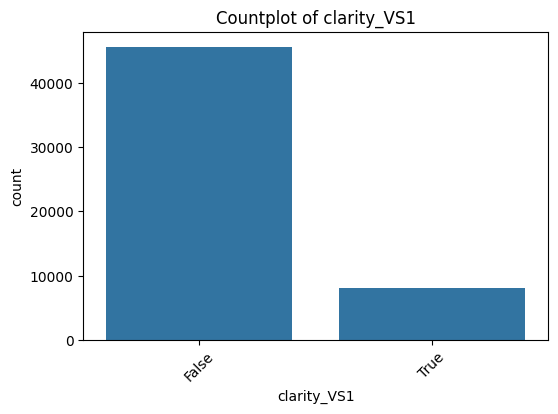

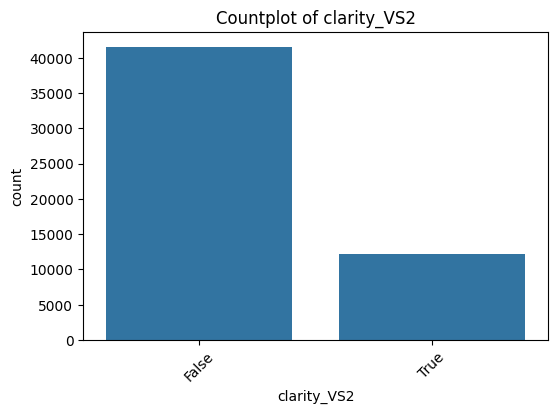

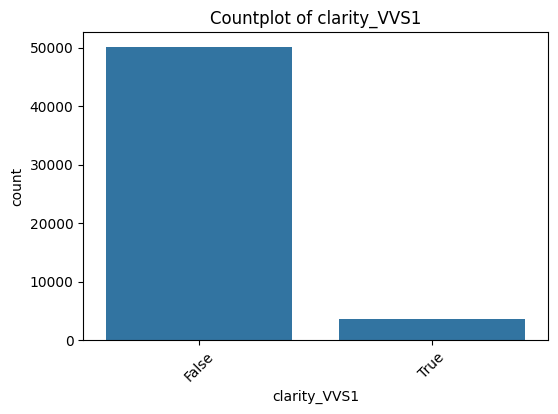

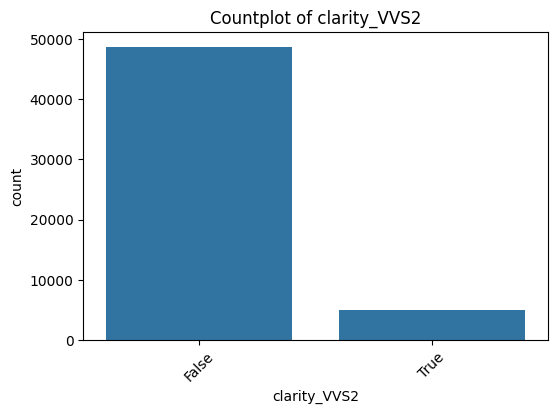

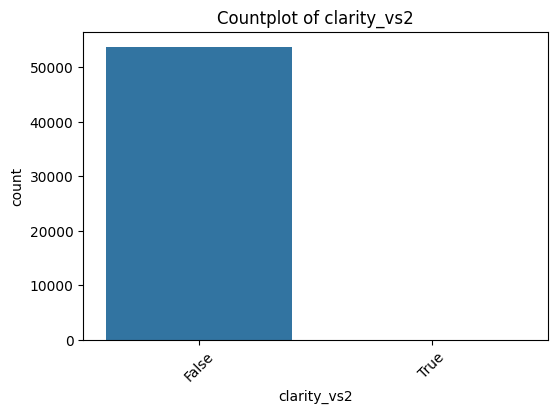

In [14]:
#---Plots---
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()


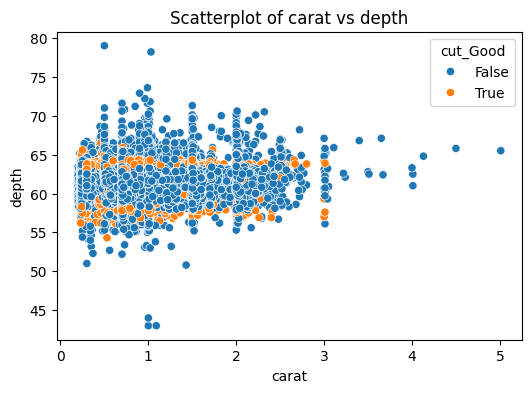

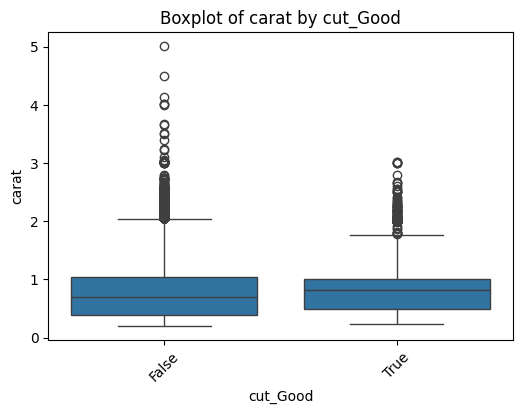

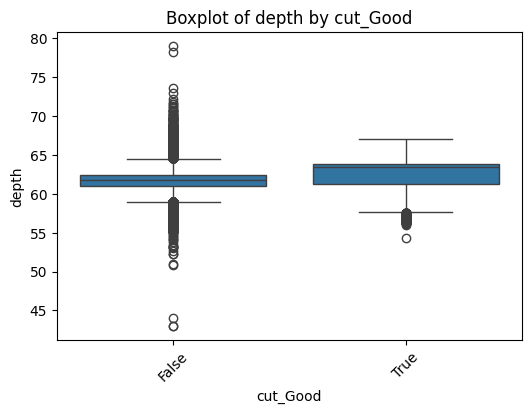

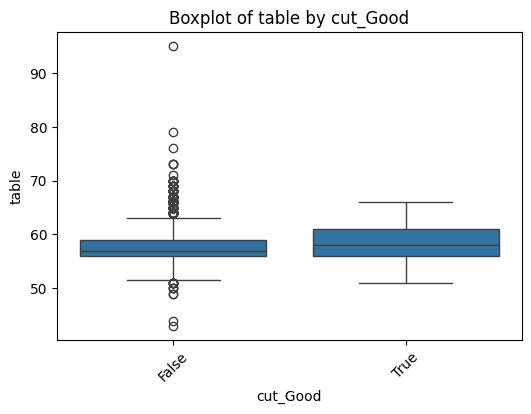

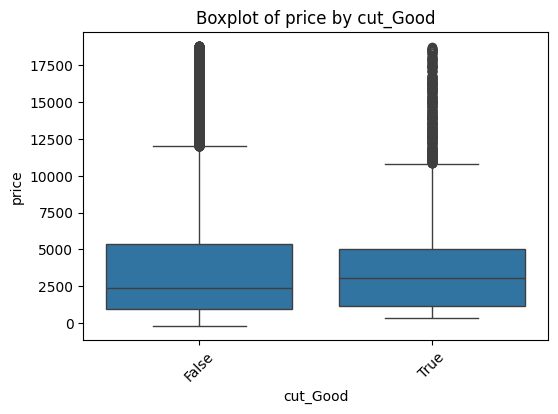

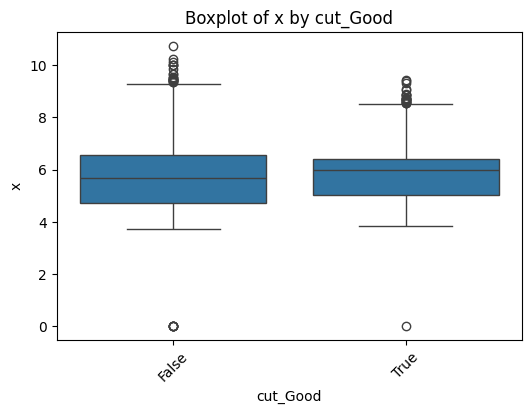

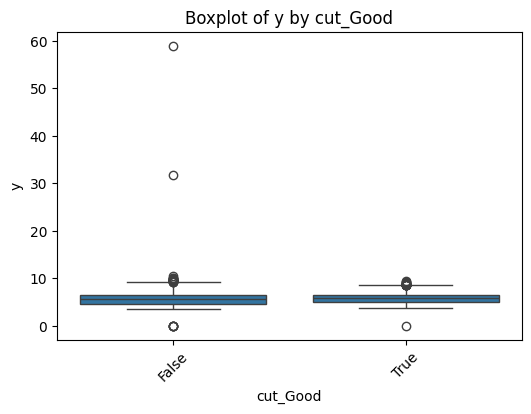

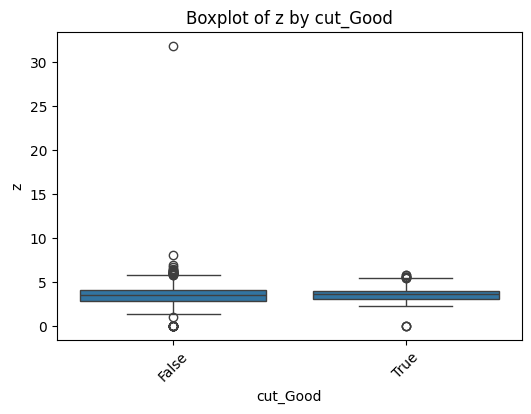

In [15]:
#---2D Scatter & Boxplots---
if len(numeric_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], hue=categorical_cols[0] if len(categorical_cols) > 0 else None)
    plt.title(f"Scatterplot of {numeric_cols[0]} vs {numeric_cols[1]}")
    plt.show()

for col in numeric_cols:
    if len(categorical_cols) > 0:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[categorical_cols[0]], y=df[col])
        plt.title(f"Boxplot of {col} by {categorical_cols[0]}")
        plt.xticks(rotation=45)
        plt.show()


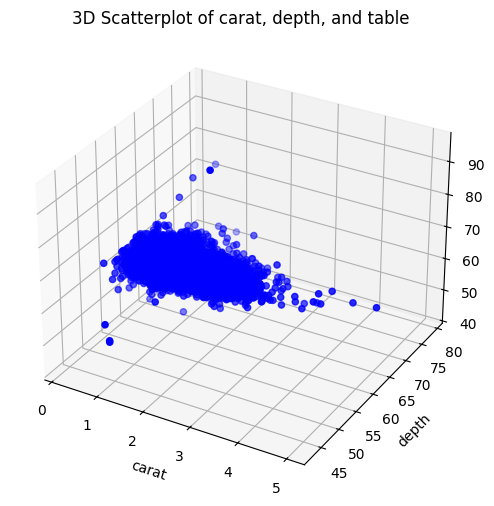

In [16]:
# ---3D Plot---
if len(numeric_cols) >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[numeric_cols[0]], df[numeric_cols[1]], df[numeric_cols[2]], c='blue', marker='o')
    ax.set_xlabel(numeric_cols[0])
    ax.set_ylabel(numeric_cols[1])
    ax.set_zlabel(numeric_cols[2])
    plt.title(f"3D Scatterplot of {numeric_cols[0]}, {numeric_cols[1]}, and {numeric_cols[2]}")
    plt.show()


In [18]:
#---Encoding Categorical Data---
df_encoded = df.copy()
for col in categorical_cols:
    if df[col].nunique() <= 2:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    else:
        df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)
print("\nData after encoding:")
display(df_encoded.head())



Data after encoding:


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,clarity_8,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,clarity_vs2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
#---Scaling Numeric Data---
df_scaled = df_encoded.copy()
numeric_cols = df_scaled.select_dtypes(include=np.number).columns

for col in numeric_cols:
   
    skewness = df_scaled[col].skew()
    
    if skewness > 1 or skewness < -1:
        df_scaled[col] = np.log1p(df_scaled[col])
    else:
        mean_val = df_scaled[col].mean()
        std_val = df_scaled[col].std()
        df_scaled[col] = (df_scaled[col] - mean_val) / std_val

print("\nData after scaling:")
print(df_scaled.head())



Data after scaling:
      carat     depth     table     price         x         y         z  \
0  0.207014 -0.173494 -1.100480  5.789960 -1.589306  1.605430  1.232560   
1  0.190620 -1.362403  1.585607  5.789960 -1.642841  1.576915  1.196948   
2  0.207014 -3.390541  3.376332  5.793014 -1.500080  1.623341  1.196948   
3  0.254642  0.455929  0.242563  5.814131 -1.366242  1.654411  1.289233   
4  0.270027  1.085351  0.242563  5.817111 -1.241326  1.677097  1.321756   

   cut_Good  cut_Ideal  cut_Premium  ...  clarity_8  clarity_I1  clarity_IF  \
0  0.000000   1.226357     0.000000  ...        0.0         0.0         0.0   
1  0.000000  -0.815408     0.693359  ...        0.0         0.0         0.0   
2  0.693359  -0.815408     0.000000  ...        0.0         0.0         0.0   
3  0.000000  -0.815408     0.693359  ...        0.0         0.0         0.0   
4  0.693359  -0.815408     0.000000  ...        0.0         0.0         0.0   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2

c:\Users\CRIZMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\CRIZMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


Thank you _ Abdelrhamn Elsaeed
